3) Crie um gráfico de linhas mostrando a evolução do valor total de vendas (Amount) ao longo do tempo (Date). Para isso:

- Agrupe os dados por data e some os valores de venda.
- Adicione uma legenda.
- Adicione uma linha horizontal indicando o valor médio das vendas ao longo do tempo (linha vermelha, tracejada, com uma seta e o texto "Média").
- Destaque o maior e o menor valor de vendas no período com setas indicativas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("Chocolate Sales.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")
df["Amount"] = df["Amount"].replace('[\\$,]', '', regex=True).astype(float)

In [5]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


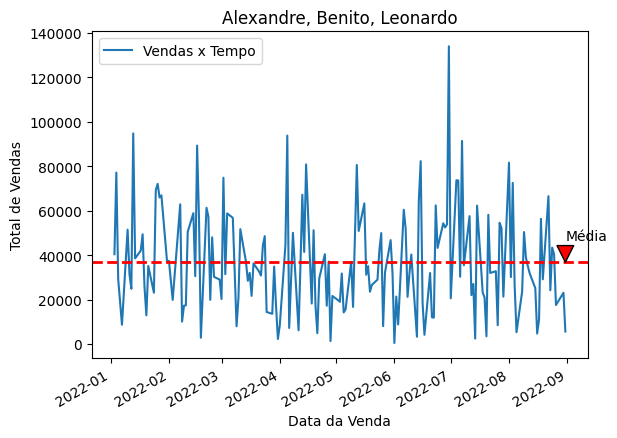

In [6]:
agrupado = df.groupby("Date")["Amount"].sum()
media_vendas = agrupado.mean()

ax = agrupado.plot()
ax.set_title("Alexandre, Benito, Leonardo")
ax.legend(["Vendas x Tempo"])
ax.set_xlabel("Data da Venda")
ax.set_ylabel("Total de Vendas")

ax.axhline(media_vendas, color="red", linestyle="dashed", linewidth=2)

ax.annotate("Média", 
            xy=(agrupado.index[-1], media_vendas), 
            xytext=(agrupado.index[-1], media_vendas + 10000),  # Deixa o texto mais perto do ponto
            arrowprops=dict(facecolor="red", shrink=0.5))  # Encurta mais a seta

plt.show()

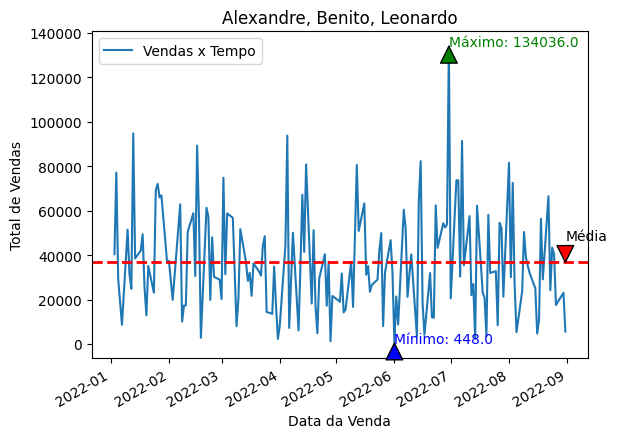

In [7]:
agrupado = df.groupby("Date")["Amount"].sum()

media_vendas = agrupado.mean()
max_vendas = agrupado.max()
min_vendas = agrupado.min()

data_max = agrupado.idxmax() # data do maior valor de venda
data_min = agrupado.idxmin()

ax = agrupado.plot()

ax.set_title("Alexandre, Benito, Leonardo")
ax.legend(["Vendas x Tempo"])
ax.set_xlabel("Data da Venda")
ax.set_ylabel("Total de Vendas")

# Adicionar a linha horizontal da média
ax.axhline(media_vendas, color="red", linestyle="dashed", linewidth=2) # linha de media

ax.annotate("Média", 
            xy=(agrupado.index[-1], media_vendas), 
            xytext=(agrupado.index[-1], media_vendas + 10000),  # Deixa o texto mais perto do ponto
            arrowprops=dict(facecolor="red", shrink=0.5))  # Encurta mais a seta

ax.annotate(f"Máximo: {max_vendas}", xy=(data_max, max_vendas), 
            xytext=(data_max, max_vendas + 5),
            arrowprops=dict(facecolor="green", shrink=0.05),
            fontsize=10, color="green")

ax.annotate(f"Mínimo: {min_vendas}", xy=(data_min, min_vendas), 
            xytext=(data_min, min_vendas - 10),
            arrowprops=dict(facecolor="blue", shrink=0.05),
            fontsize=10, color="blue")

plt.show()

4) Crie um gráfico de barras para mostrar o total de vendas (Amount) por país (Country).

- A barra de cada país deve conter uma cor diferente.
- Os valores devem ser ordenados do maior para o menor total de vendas.

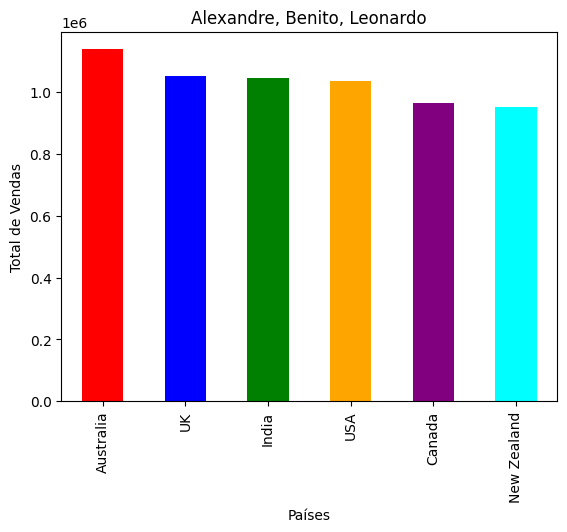

In [8]:
agrupado = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)

cores = ["red", "blue", "green", "orange", "purple", "cyan"]
ax = agrupado.plot(kind="bar", color=cores)

ax.set_title("Alexandre, Benito, Leonardo")
ax.set_ylabel("Total de Vendas")
ax.set_xlabel("Países")

plt.show()

5) Crie um gráfico de dispersão mostrando a relação entre Boxes Shipped e Amount.

- Adicione uma transparência para melhorar a visualização dos pontos.
- Cada ponto deve possuir uma cor diferente baseado no País. Utilize as mesmas cores usadas no exercício anterior.
- Existe uma relação linear entre o número de caixas enviadas e o valor das vendas?

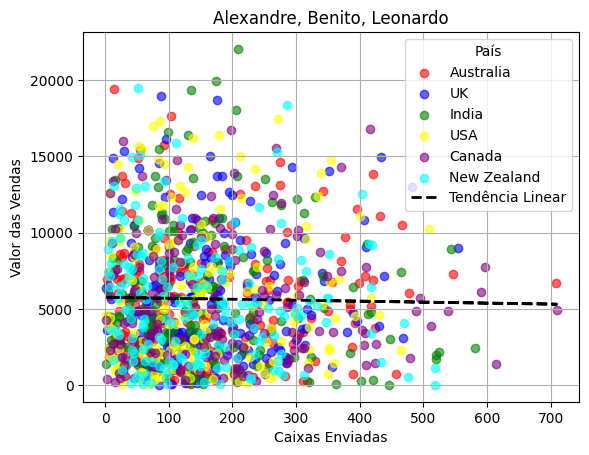

In [9]:
cores_paises = {
    "Australia": "red",
    "UK": "blue",
    "India": "green",
    "USA": "yellow",
    "Canada": "purple",
    "New Zealand": "cyan"
}

for pais, cor in cores_paises.items():
    dados_pais = df[df["Country"] == pais]  # filtrando dados do país
    plt.scatter(dados_pais["Boxes Shipped"], dados_pais["Amount"],
                color=cor, alpha=0.6, label=pais)  # opacidade

# linha de tendência para analisar a relação linear
x = df["Boxes Shipped"]
y = df["Amount"]
coef = np.polyfit(x, y, 1)  # Ajuste linear
polinomio = np.poly1d(coef)  # Criar a equação da reta
plt.plot(x, polinomio(x), color="black", linestyle="dashed", linewidth=2, label="Tendência Linear")

plt.title("Alexandre, Benito, Leonardo")
plt.xlabel("Caixas Enviadas")
plt.ylabel("Valor das Vendas")
plt.legend(title="País")
plt.grid(True)

plt.show()


6) Crie um gráfico de pizza mostrando a porcentagem do valor total de vendas (Amount) de cada produto (Product).

- Faça com que os valores sejam apresentados com 2 casas após a vírgula.
- A visualização ficou clara? O gráfico transmite bem as informações?
- Faça um gráfico de barras para representar o mesmo gráfico e compare as abordagens. 

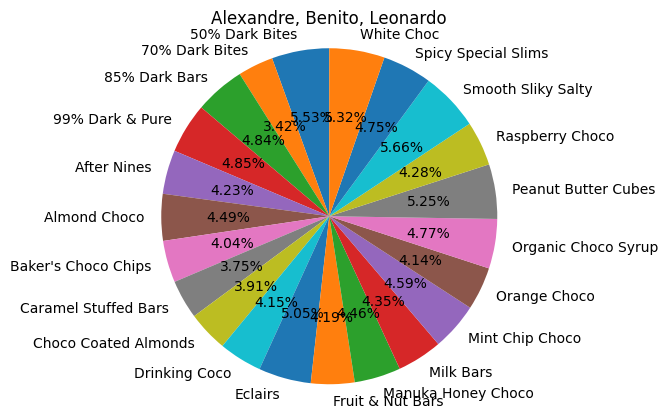

In [ ]:
agrupado = df.groupby("Product")["Amount"].sum()

plt.pie(agrupado, labels=agrupado.index, 
        autopct="%1.2f%%", startangle=90)

plt.title("Alexandre, Benito, Leonardo")
plt.axis("equal")

plt.show()

# A visualização não ficou clara, não transmite bem as informações

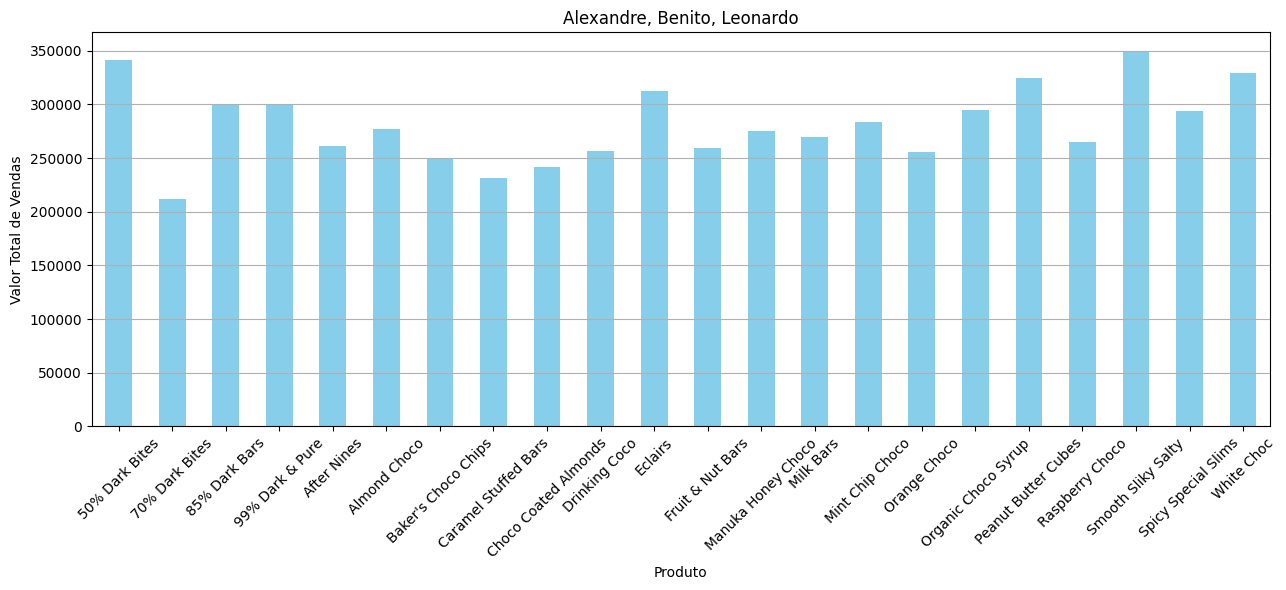

In [ ]:
agrupado = df.groupby("Product")["Amount"].sum()

plt.figure(figsize=(13, 6))
ax = agrupado.plot(kind="bar", color="skyblue")

ax.set_title("Alexandre, Benito, Leonardo")
ax.set_ylabel("Valor Total de Vendas")
ax.set_xlabel("Produto")

plt.xticks(rotation=45)  # Rotaciona os nomes dos produtos para melhor leitura
plt.grid(axis="y")

plt.tight_layout()
plt.show()

# #A visualização ficou clara e transmite bem as informações, o gráfico não ficou bom sendo de pizza por ser muitos produtos e diferenças pequenas entre os valores.